<a href="https://colab.research.google.com/github/jatin1bagga/SENTENCE-SIMILARITY/blob/main/SENTENCE_SIMILARITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from sentence_transformers import SentenceTransformer, util
from datasets import load_dataset
from scipy.stats import spearmanr
import time
import os

# Load dataset
sts = load_dataset("stsb_multi_mt", name="en", split="dev")  # Development split

# Select models to evaluate
models = {
    "paraphrase-MiniLM-L6-v2": SentenceTransformer('paraphrase-MiniLM-L6-v2'),
    "all-MiniLM-L12-v2": SentenceTransformer('all-MiniLM-L12-v2')
}

# Prepare data
sentence1 = sts['sentence1'][:100]  # First 100 samples
sentence2 = sts['sentence2'][:100]
human_scores = sts['similarity_score'][:100]

results = []

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating: {model_name}")

    # Execution time
    start_time = time.time()
    predicted_scores = []
    for s1, s2 in zip(sentence1, sentence2):
        emb1 = model.encode(s1, convert_to_tensor=True)
        emb2 = model.encode(s2, convert_to_tensor=True)
        score = util.cos_sim(emb1, emb2).item()
        predicted_scores.append(score)
    end_time = time.time()

    # Calculate Spearman Correlation
    spearman_corr, _ = spearmanr(human_scores, predicted_scores)

    # Calculate execution time
    exec_time = (end_time - start_time) / len(sentence1)  # Average time per sentence pair

    # Calculate model size
    model.save(f"{model_name}_saved")
    model_size = sum(os.path.getsize(os.path.join(dirpath, filename))
                     for dirpath, dirnames, filenames in os.walk(f"{model_name}_saved")
                     for filename in filenames) / (1024 * 1024)  # Size in MB

    # Append results
    results.append({
        "Model": model_name,
        "Cosine Similarity (Sample)": predicted_scores[0],  # Example score for the first pair
        "Spearman Correlation": spearman_corr,
        "Execution Time (ms)": exec_time * 1000,
        "Model Size (MB)": model_size
    })

# Print results
for result in results:
    print(result)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/470k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/108k [00:00<?, ?B/s]

dev-00000-of-00001.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/1500 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Evaluating: paraphrase-MiniLM-L6-v2
Evaluating: all-MiniLM-L12-v2
{'Model': 'paraphrase-MiniLM-L6-v2', 'Cosine Similarity (Sample)': 0.9912322163581848, 'Spearman Correlation': 0.9336935950863151, 'Execution Time (ms)': 47.2107195854187, 'Model Size (MB)': 87.56114387512207}
{'Model': 'all-MiniLM-L12-v2', 'Cosine Similarity (Sample)': 0.9954710602760315, 'Spearman Correlation': 0.9393685572841804, 'Execution Time (ms)': 68.69708061218262, 'Model Size (MB)': 128.1926155090332}


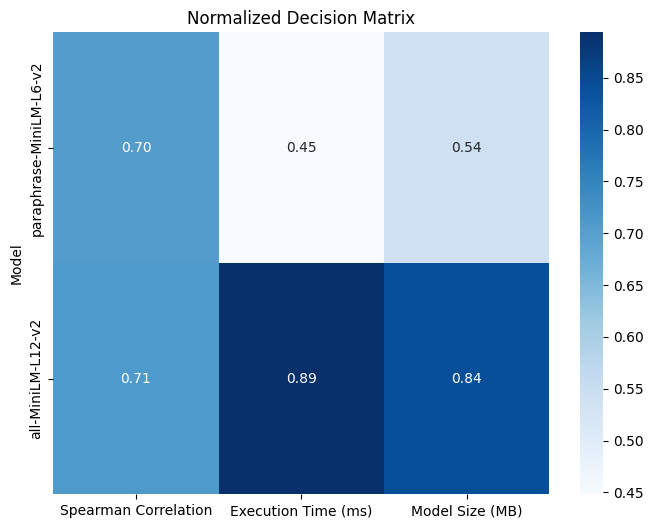

<ipython-input-4-f2625461d157>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="TOPSIS Score", data=df, palette="viridis")


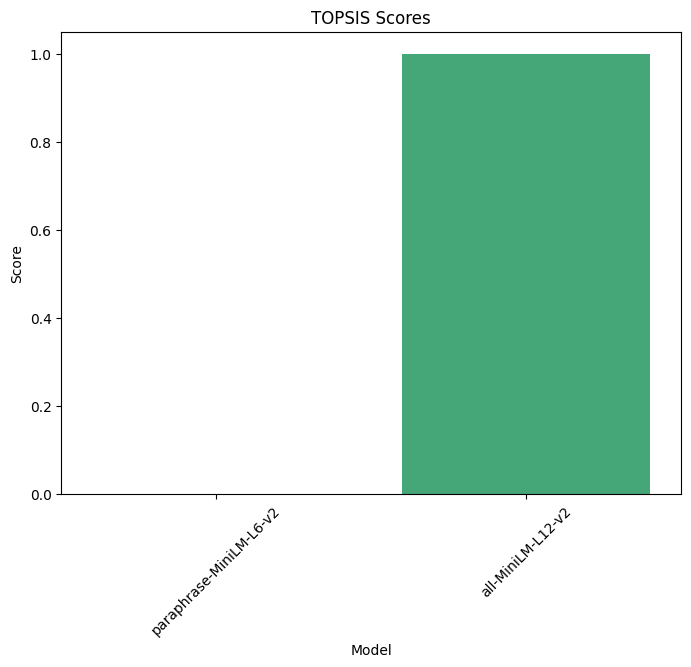

Normalized Decision Matrix:
                         Spearman Correlation  Execution Time (ms)  \
Model                                                                
paraphrase-MiniLM-L6-v2              0.704837             0.448180   
all-MiniLM-L12-v2                    0.709370             0.893943   

                         Model Size (MB)  
Model                                     
paraphrase-MiniLM-L6-v2         0.541463  
all-MiniLM-L12-v2               0.840725  

TOPSIS Results:
                     Model  Spearman Correlation  Execution Time (ms)  \
0  paraphrase-MiniLM-L6-v2                 0.933               32.277   
1        all-MiniLM-L12-v2                 0.939               64.380   

   Model Size (MB)  TOPSIS Score  Rank  
0          82.5611           0.0   2.0  
1         128.1920           1.0   1.0  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input metrics table
data = {
    "Model": ["paraphrase-MiniLM-L6-v2", "all-MiniLM-L12-v2"],
    "Spearman Correlation": [0.933, 0.939],  # Higher is better
    "Execution Time (ms)": [32.277, 64.380],       # Lower is better
    "Model Size (MB)": [82.5611, 128.192]         # Lower is better
}
# Convert to DataFrame
df = pd.DataFrame(data)

# Normalize the matrix
metrics = df.iloc[:, 1:].values
norm_matrix = metrics / np.sqrt((metrics**2).sum(axis=0))

# Assign weights to criteria
weights = np.array([0.5, 0.3, 0.2])  # Example: Accuracy = 50%, Time = 30%, Size = 20%
weighted_matrix = norm_matrix * weights

# Determine Ideal and Negative Ideal Solutions
ideal_solution = np.max(weighted_matrix, axis=0)  # Max for benefit criteria
negative_ideal_solution = np.min(weighted_matrix, axis=0)  # Min for benefit criteria

# Calculate distances to Ideal and Negative Ideal
dist_to_ideal = np.sqrt(((weighted_matrix - ideal_solution) ** 2).sum(axis=1))
dist_to_negative_ideal = np.sqrt(((weighted_matrix - negative_ideal_solution) ** 2).sum(axis=1))

# Calculate relative closeness to the ideal solution
topsis_scores = dist_to_negative_ideal / (dist_to_ideal + dist_to_negative_ideal)

# Add scores to DataFrame
df["TOPSIS Score"] = topsis_scores
df["Rank"] = df["TOPSIS Score"].rank(ascending=False)

# Correct column names for the normalized matrix
metric_columns = ["Spearman Correlation", "Execution Time (ms)", "Model Size (MB)"]
norm_df = pd.DataFrame(norm_matrix, columns=metric_columns, index=df["Model"])

# Save results
norm_df.to_csv("normalized_matrix.csv")
df.to_csv("topsis_results.csv", index=False)

# Visualization
# Heatmap of normalized decision matrix
plt.figure(figsize=(8, 6))
sns.heatmap(norm_df, annot=True, cmap="Blues", cbar=True, fmt=".2f")
plt.title("Normalized Decision Matrix")
plt.savefig("normalized_matrix.png")
plt.show()

# Bar chart for TOPSIS scores
plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="TOPSIS Score", data=df, palette="viridis")
plt.title("TOPSIS Scores")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.savefig("topsis_scores.png")
plt.show()

# Display results
print("Normalized Decision Matrix:")
print(norm_df)
print("\nTOPSIS Results:")
print(df)
